In [35]:
%matplotlib inline

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data = "Data/mouse_drug_data.csv"
clinical_trial_data = "Data/clinicaltrial_data.csv"

In [40]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data)
clinical_data = pd.read_csv(clinical_trial_data) 
clinical_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [44]:
mouse_data

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [45]:
# Reveiwing mouse data indicates mouse g989 was given two drugs and will be removed from dataset
clinical_data = clinical_data.drop(clinical_data.loc[clinical_data['Mouse ID']=='g989'].index)
mouse_data = mouse_data.drop(mouse_data.loc[mouse_data['Mouse ID']=='g989'].index)

In [46]:
# Combine the data into a single dataset
combined_data_df = pd.merge(clinical_data, mouse_data, how='outer', on='Mouse ID')

# Reduce data to look at effects of Capomulin, Infubinol, Ketapril, and Placebo
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
reduced_data_df = combined_data_df.loc[combined_data_df['Drug'].isin(drugs)]
reduced_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin
1876,m601,30,31.758275,1,Capomulin
1877,m601,35,30.834357,1,Capomulin
1878,m601,40,31.378045,1,Capomulin


In [47]:
#Calculate the mean for each Tumor Volume Data, Group by Drug and Timepoint
tumor_mean = reduced_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert data into DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082

In [48]:
# Store the SEM value of the Tumor Volumes Group by Drug and Timepoint
tumor_error = reduced_data_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_error_df = pd.DataFrame(tumor_error)

# Preview DataFrame
tumor_error_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
Ketapril  0                    0.000000
          5                    0.264819
          10                   0.357421
          15                   0.580268
          20                   0.726484
          25                   0.755413
          30                   0.934121
          35                   1.127867
          40                   1.158449
          45                   1.453186
Placebo   0                    0.000000
          5                    0.218091
          10                   0.402064
          15                   0.614461
          20                   0.839609
          25                   1.034872
          30                   1.218231
          35                   1.287481
          40                   1.370634
          45                   1.351726

In [49]:
# Re-Format the Data Frames, index on Timepoint, Column = Drugs and mean of tumor size
mean_reformat = tumor_mean_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

error_reformat = tumor_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


# Preview data sets
mean_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


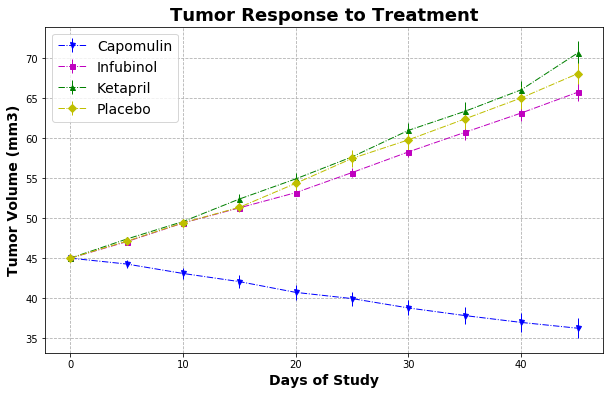

In [50]:
#Set up splatterplot
plt.figure(figsize=(10,6))

# plt treatment by days using index for x-axis, mean for y-axis and error bars to show deviation of y

plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"],\
             color="b", marker="v", markersize=5, linestyle="dashdot", linewidth=1)
plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],\
             color="m", marker="s", markersize=5, linestyle="dashdot", linewidth=1)
plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"], yerr=error_pivot["Ketapril"],\
             color="g", marker="^", markersize=5, linestyle="dashdot", linewidth=1)
plt.errorbar(mean_pivot.index, mean_pivot["Placebo"], yerr=error_pivot["Placebo"],\
             color="y", marker="D", markersize=5, linestyle="dashdot", linewidth=1)


# Set x and y axis labels and title of the chart
plt.title("Tumor Response to Treatment", fontsize=18, fontweight='bold')
plt.xlabel("Days of Study", fontsize=14, fontweight='bold') 
plt.ylabel("Tumor Volume (mm3)", fontsize=14, fontweight='bold') 

# Place dashed grid and legend in best location
plt.grid(linestyle="dashed")
plt.legend(drugs, loc='best', fontsize=14, fancybox=True)

# Show the plot
plt.show()

In [51]:
# Store the Mean of Metastatic sites Grouped by Drug and Timepoint
meta_mean = reduced_data_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)

# Preview DataFrame
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [52]:
# Store the SEM of Metastatic sites Grouped by Drug and Timepoint
meta_error = reduced_data_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
meta_error_df = pd.DataFrame(meta_error)
# Preview DataFrame
meta_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
Ketapril  0                  0.000000
          5                  0.098100
          10                 0.142018
          15                 0.191381
          20                 0.236680
          25                 0.288275
          30                 0.347467
          35                 0.361418
          40                 0.315725
          45                 0.278722
Placebo   0                  0.000000
          5                  0.100947
          10                 0.115261
          15                 0.190221
          20                 0.234064
          25                 0.263888
          30                 0.300264
          35                 0.341412
          40                 0.297294
          45                 0.304240

In [53]:
# Re-Format the Data Frames, index by timepoint, columns by drug name and tumor mean and error values by df
meta_reformat = meta_mean_df.reset_index()
meta_pivot = meta_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

meta_error_reformat = meta_error_df.reset_index()
meta_error_pivot = meta_error_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview data sets
meta_error_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


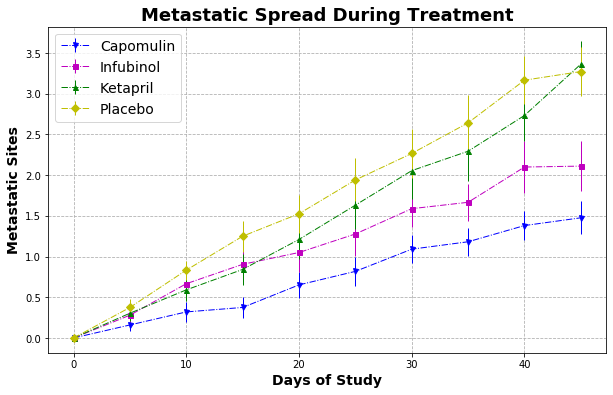

In [54]:
# Set up splatterplot
plt.figure(figsize=(10,6))

# Plt treatment by days(use index which is timepoint)

plt.errorbar(meta_pivot.index, meta_pivot["Capomulin"], yerr=meta_error_pivot["Capomulin"],\
             color="b", marker="v", markersize=5, linestyle="-.", linewidth=1)
plt.errorbar(meta_pivot.index, meta_pivot["Infubinol"], yerr=meta_error_pivot["Infubinol"],\
             color="m", marker="s", markersize=5, linestyle="-.", linewidth=1)
plt.errorbar(meta_pivot.index, meta_pivot["Ketapril"], yerr=meta_error_pivot["Ketapril"],\
             color="g", marker="^", markersize=5, linestyle="-.", linewidth=1)
plt.errorbar(meta_pivot.index, meta_pivot["Placebo"], yerr=meta_error_pivot["Placebo"],\
             color="y", marker="D", markersize=5, linestyle="-.", linewidth=1)


# Set x and y axis labels and title of the chart
# Increase font size to make chart better
plt.title("Metastatic Spread During Treatment", fontsize=18, fontweight='bold')
plt.xlabel("Days of Study", fontsize=14, fontweight='bold') 
plt.ylabel("Metastatic Sites", fontsize=14, fontweight='bold') 

# Place dashed grid and legend in best location
plt.grid(linestyle="dashed")
plt.legend(drugs, loc='best', fontsize=14, fancybox=True)

# Show the plot
plt.show()

In [55]:
# Calculate the count of mice grouped by Drug and Timepoint
mice_count = reduced_data_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})

# Preview DataFrame
mice_count_df

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
Ketapril  0                   25
          5                   23
          10                  22
          15                  19
          20                  19
          25                  19
          30                  18
          35                  17
          40                  15
          45                  11
Placebo   0                   25
          5                   24
          10                  24
          15                  20
          20                  19
          25                  17
          30                  15
          35                  14
          40                  12
          45                  11

In [56]:
# Re-Format the Data Frames of mice count
mice_reformat = mice_count_df.reset_index()
mice_pivot = mice_reformat.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mice_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


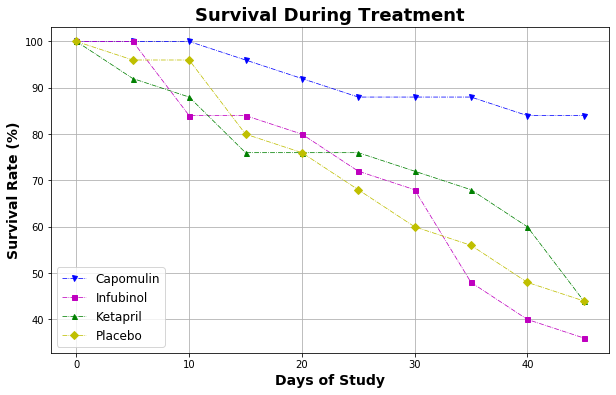

In [57]:
# Set up splatterplot
plt.figure(figsize=(10,6))

# Generate the Plot (Accounting for percentages) dividing by number of mice to start with 
plt.plot(100 * mice_pivot["Capomulin"] / 25, "bv", linestyle="-.", markersize=5, linewidth=0.75)
plt.plot(100 * mice_pivot["Infubinol"] / 25, "ms", linestyle="-.", markersize=5, linewidth=0.75)
plt.plot(100 * mice_pivot["Ketapril"] / 25, "g^", linestyle="-.", markersize=5, linewidth=0.75)
plt.plot(100 * mice_pivot["Placebo"] / 25 , "yD", linestyle="-.", markersize=5, linewidth=0.75)

# Set x and y axis labels and title of the chart
# Increase font size to make chart look better
plt.title("Survival During Treatment", fontsize=18, fontweight='bold')
plt.ylabel("Survival Rate (%)",  fontsize=14, fontweight='bold') 
plt.xlabel("Days of Study", fontsize=14, fontweight='bold') 
plt.grid(True)
plt.legend(drugs, loc="best", fontsize=12, fancybox=True)

# Show the Figure
plt.show()

In [58]:
# Change in tumor size over course of 45 days for each drug
capchange = ((mean_pivot["Capomulin"][45] - mean_pivot["Capomulin"][0])/45)*100
infuchange = ((mean_pivot["Infubinol"][45] - mean_pivot["Infubinol"][0])/45)*100
ketachange = ((mean_pivot["Ketapril"][45] - mean_pivot["Ketapril"][0])/45)*100
placchange = ((mean_pivot["Placebo"][45] - mean_pivot["Placebo"][0])/45)*100


In [59]:
# Create new dataframe
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [capchange, infuchange, ketachange, placchange]
                              })
drug_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


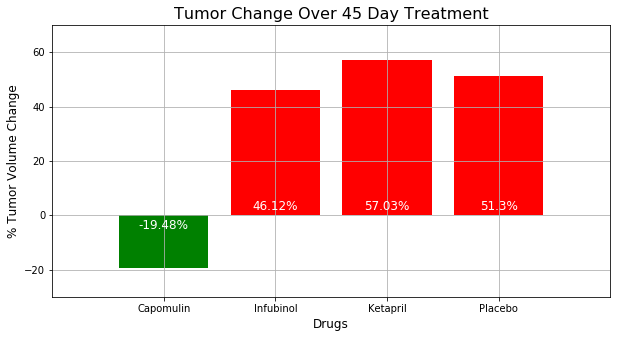

In [60]:
# PLot Data
plt.figure(figsize=(10, 5))
plt.xlim(-1, 4)
plt.ylim(-30, 70)
plt.grid(True)
plt.title("Tumor Change Over 45 Day Treatment", fontsize=16)
plt.xlabel("Drugs", fontsize=12)
plt.ylabel("% Tumor Volume Change", fontsize=12)
count = 0
for x in drug_change_df['Percent Change']:
   if x < 0:
       y_value = -5
   else:
       y_value = 2
   plt.text(count, y_value, str(round(x, 2)) + '%', ha = 'center', color = 'white', fontsize = 12)
   count += 1
plt.bar("Drug", "Percent Change", data=drug_change_df, color=['g','r','r','r'])
plt.show()
